In [1]:
import pandas as pd
import datetime
import nltk
import spacy

import re
from time import time 
from collections import defaultdict

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [57]:
import numpy as np
import pandas as pd
import gc
import os
import json
from collections import Counter, defaultdict
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import re
import nltk
from gensim.models import word2vec
from sklearn.manifold import TSNE
year_pattern = r'([1-2][0-9]{3})'

In [245]:
def get_metadata():
    with open('arxivData.json', 'r') as f:
        for line in f:
            yield line
            

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_|\r|\n)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

STOP_WORDS = nltk.corpus.stopwords.words()

In [246]:
target_key = 'abstract'

abstracts = []

for idx, paper in enumerate(get_metadata()):
    if idx == 5000:
        break
    for k, v in json.loads(paper).items():
        if k == target_key:
            abstracts.append(clean_sentence(v).strip().split())

In [18]:
abstracts[0:2]

[['fully',
  'differential',
  'calculation',
  'perturbative',
  'quantum',
  'chromodynamics',
  'ispresented',
  'production',
  'massive',
  'photon',
  'pairs',
  'hadron',
  'colliders',
  'allnexttoleading',
  'order',
  'perturbative',
  'contributions',
  'quarkantiquarkgluonantiquark',
  'gluongluon',
  'subprocesses',
  'included',
  'asallorders',
  'resummation',
  'initialstate',
  'gluon',
  'radiation',
  'valid',
  'atnexttonexttoleading',
  'logarithmic',
  'accuracy',
  'region',
  'phase',
  'space',
  'isspecified',
  'calculation',
  'reliable',
  'agreement',
  'isdemonstrated',
  'data',
  'fermilab',
  'tevatron',
  'predictions',
  'made',
  'formore',
  'detailed',
  'tests',
  'cdf',
  'data',
  'predictions',
  'shown',
  'fordistributions',
  'diphoton',
  'pairs',
  'produced',
  'energy',
  'large',
  'hadroncollider',
  'lhc',
  'distributions',
  'diphoton',
  'pairs',
  'decay',
  'higgsboson',
  'contrasted',
  'produced',
  'qcd',
  'processes',
  '

In [9]:
model = word2vec.Word2Vec(abstracts, vector_size=100, window=20, min_count=200, workers=4)

In [18]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in list(model.wv.index_to_key):
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\cll48\anaconda3\envs\Python_3_8\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\cll48\anaconda3\envs\Python_3_8\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


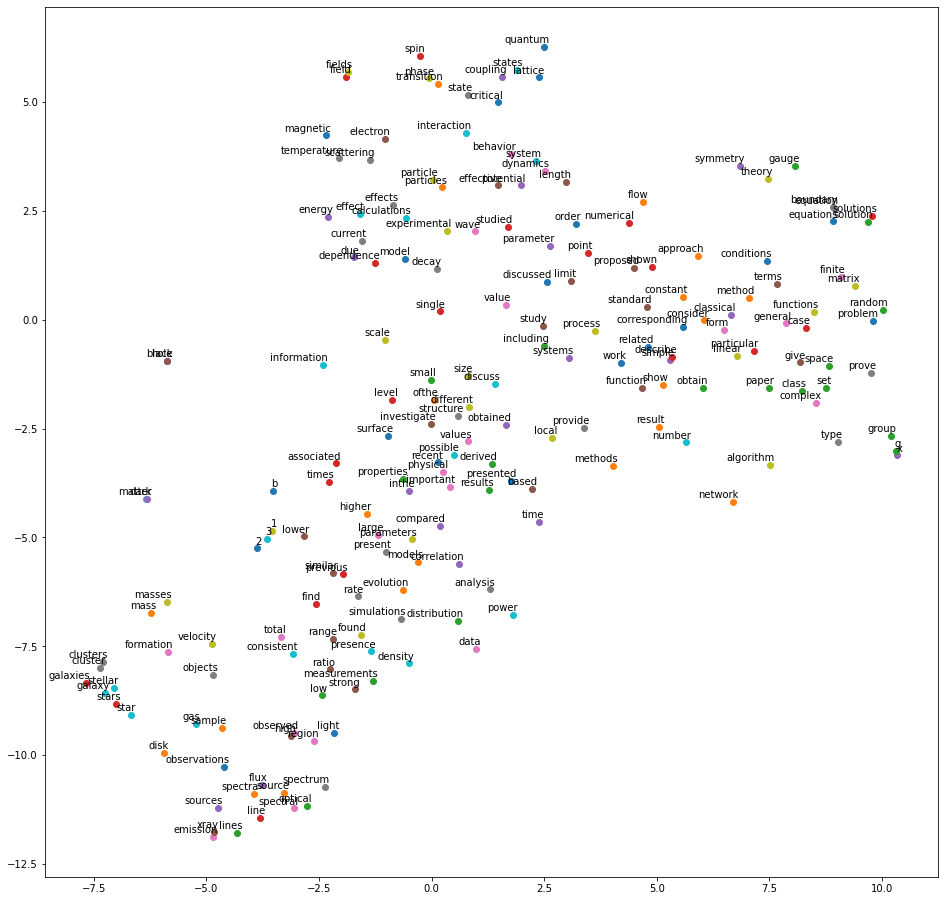

In [19]:
tsne_plot(model)

In [2]:
from tensorflow.keras.layers import Attention
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("scisumm.csv"
                 ,nrows=151) #due to the GPU instead of all rowa used 151 in project

In [4]:
data.drop_duplicates(subset=['text'],inplace=True)#dropping duplicates
data.dropna(axis=0,inplace=True)#dropping na

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     151 non-null    object
 1   summary  151 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


In [6]:
ownwords = ["we","We","to","the","for","fi","ff","zk","x","fifi","f","fl","of","for","is","are","for","to","in","and","at","with"]
Prepositions = ['about','above','across','after','against','along','among','around','at','before','behind','between','beyond','but','by','concerning','despite','down','during','except','following','for','from','in','including','into','like','near','of','off','on','onto','out','over','past','plus','since','throughout','to','towards','under','until','up','upon','up','to','with','within','without']

In [7]:
stop_words = set(stopwords.words('english')) 
stop_words.update(ownwords)
stop_words.update(Prepositions)
def text_cleaner(text,num):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    #newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>2:                                              
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [8]:
print(stop_words)

{'yourselves', 'his', 'with', 'ours', 'down', 'most', 'where', "should've", 'needn', 'fi', 'between', "weren't", 'fl', 'for', 'have', 'over', 'same', "haven't", 'don', 'beyond', "mustn't", "couldn't", 'its', 'fifi', 'if', 'won', 'theirs', 've', 'will', 'towards', 'wouldn', 'more', "shouldn't", 'be', 'now', 'itself', 'isn', 'onto', 'plus', 'upon', 'does', 'themselves', 'and', 'of', 'do', 'is', 'o', 'past', 'along', 'f', "wouldn't", "you're", "you'd", 'was', 'ma', 'including', "didn't", 'among', 'zk', 'despite', "needn't", 'mightn', 'then', 'within', 'all', 'she', 'while', "you'll", 'm', 'my', 'myself', 'weren', 'being', 'some', 'only', 'himself', 'since', 'how', 'i', 'during', "mightn't", 'couldn', 'had', 'concerning', 'above', 'ourselves', 'were', "you've", 'nor', "doesn't", 'wasn', 'there', 'We', 'below', 'yourself', 'are', 'y', "hadn't", 'it', "wasn't", 'd', 'near', 'should', 'ff', 'at', 'we', 'or', 'ain', 'because', 'am', 'an', 'been', 'into', 'behind', 'again', 'about', 'the', "she

In [9]:
#call the function
cleaned_text = []
for t in data['text']:
    cleaned_text.append(text_cleaner(t,0)) 

In [10]:
#call the function
cleaned_summary = []
for t in data['summary']:
    cleaned_summary.append(text_cleaner(t,0))

In [11]:
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary

In [12]:
#data.replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

In [13]:
data.head()

,text,summary,cleaned_text,cleaned_summary
0,"TnT - A Statistical Part-Of-Speech Tagger Trigrams'n'Tags (TnT) is an efficient statistical part-of-speech tagger. Contrary to claims found elsewhere in the literature, we argue that a tagger base...","TnT - A Statistical Part-Of-Speech Tagger\nTrigrams'n'Tags (TnT) is an efficient statistical part-of-speech tagger.\nContrary to claims found elsewhere in the literature, we argue that a tagger ba...",tnt statistical part speech tagger trigrams tags efficient statistical part speech tagger contrary claims found elsewhere literature argue tagger based markov models performs least well current ap...,tnt statistical part speech tagger trigrams tags efficient statistical part speech tagger contrary claims found elsewhere literature argue tagger based markov models performs least well current ap...
1,"Mildly Non-Projective Dependency Structures Syntactic parsing requires a fine balance between expressivity and complexity, so that naturally occurring structures can be accurately parsed without c...","Mildly Non-Projective Dependency Structures\nSyntactic parsing requires a fine balance between expressivity and complexity, so that naturally occurring structures can be accurately parsed without ...",mildly non projective dependency structures syntactic parsing requires fine balance expressivity complexity naturally occurring structures accurately parsed compromising efficiency dependency base...,mildly non projective dependency structures syntactic parsing requires fine balance expressivity complexity naturally occurring structures accurately parsed compromising efficiency dependency base...
2,Using Corpus Statistics And WordNet Relations For Sense Identification Corpus-based approaches to word sense identification have flexibility and generality but suffer from a knowledge acquisition ...,Using Corpus Statistics And WordNet Relations For Sense Identification\nCorpus-based approaches to word sense identification have flexibility and generality but suffer from a knowledge acquisition...,using corpus statistics wordnet relations sense identification corpus based approaches word sense identification flexibility generality suffer knowledge acquisition bottleneck show knowledge based...,using corpus statistics wordnet relations sense identification corpus based approaches word sense identification flexibility generality suffer knowledge acquisition bottleneck show knowledge based...
3,"Automatic Labeling Of Semantic Roles present a system for identifying the semantic relationships, or filled by constituents of a sentence within a semantic frame. Given an input sentence and a tar...","Automatic Labeling Of Semantic Roles\nWe present a system for identifying the semantic relationships, or semantic roles, filled by constituents of a sentence within a semantic frame.\nGiven an inp...",automatic labeling semantic roles present system identifying semantic relationships filled constituents sentence semantic frame given input sentence target word frame system labels constituents ei...,automatic labeling semantic roles present system identifying semantic relationships semantic roles filled constituents sentence semantic frame given input sentence target word frame system labels ...
4,Generative Models For Statistical Parsing With Combinatory Categorial Grammar This paper compares a number of generative probability models for a widecoverage Combinatory Categorial Gram mar (CCG)...,Generative Models For Statistical Parsing With Combinatory Categorial Grammar\nThis paper compares a number of generative probability models for a wide-coverage Combinatory Categorial Grammar (CCG...,generative models statistical parsing combinatory categorial grammar paper compares number generative probability models widecoverage combinatory categorial gram mar parser models trained tested c...,generative models statistical parsing combinatory categorial grammar paper compares number generative probability models wide coverage 

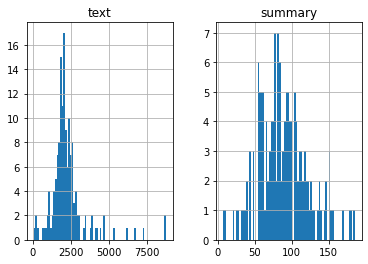

In [14]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 80)
plt.savefig('distribution.png', dpi=100)
plt.show()


In [19]:
cnt=0
for i in data['cleaned_summary']:
    if(len(i.split())<=120):
        cnt=cnt+1
print(cnt/len(data['cleaned_summary']))

0.8410596026490066


In [20]:
cnt=0
for i in data['cleaned_text']:
    if(len(i.split())<=600):
        cnt=cnt+1
print(cnt/len(data['cleaned_text']))

0.026490066225165563


In [18]:
max_text_len=600
max_summary_len=120

In [34]:
cleaned_text =np.array(data['cleaned_text'])
cleaned_summary=np.array(data['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len and len(cleaned_text[i].split())>100):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [35]:
df.drop_duplicates
df.head()

,text,summary
0,generative models statistical parsing combinatory categorial grammar paper compares number generative probability models widecoverage combinatory categorial gram mar parser models trained tested c...,generative models statistical parsing combinatory categorial grammar paper compares number generative probability models wide coverage combinatory categorial grammar parser models trained tested c...
1,bayesian learning tree substitution grammar tree substitution grammars offer many advantages context free grammars hard learn approaches resorted heuristics paper learn tsg using gibbs sampling no...,bayesian learning tree substitution grammar tree substitution grammars offer many advantages context free grammars hard learn approaches resorted heuristics paper learn tsg using gibbs sampling no...
2,efficient parsing highly ambiguous context free grammars bit vectors efficient bit vector based cky style parser context free parsing presented parser computes compact parse forest representation ...,efficient parsing highly ambiguous context free grammars bit vectors efficient bit vector based cky style parser context free parsing presented parser computes compact parse forest representation ...
3,coreference resolution performance metrics paper proposes constrained entity alignment measure evaluatingcoreference resolution metric com puted aligning reference system entities constraint syste...,coreference resolution performance metrics paper proposes constrained entity alignment measure evaluating coreference resolution metric computed aligning reference system entities constraint syste...
4,building large scale annotated chinese corpus paper address issues related building large scale chinese corpus try answer four questions speed annotation maintain high annotation quality purposes ...,building large scale annotated chinese corpus paper address issues related building large scale chinese corpus try answer four questions speed annotation maintain high annotation quality purposes ...


In [36]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [37]:
from sklearn.model_selection import train_test_split

x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.2,random_state=0,shuffle=True) 

In [38]:
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences

#prepare a tokenizer on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [39]:
thresh=5

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 87.22677595628416
Total Coverage of rare words: 55.76814856499719


In [40]:
#prepare a tokenizer on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [41]:
x_voc

188

In [42]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [43]:
thresh=0

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 0.0
Total Coverage of rare words: 0.0


In [44]:
#prepare a tokenizer on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [45]:
y_tokenizer.word_counts['sostok'],len(y_tr)  

(6, 6)

In [46]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [47]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [48]:
from keras import backend as K 
K.clear_session()

latent_dim = 500
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 900)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 900, 200)     37600       ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 900, 500),   1402000     ['embedding[0][0]']              
                                 (None, 500),                                                     
                                 (None, 500)]                                                     
                                                                                              

In [51]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [52]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=10,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/10


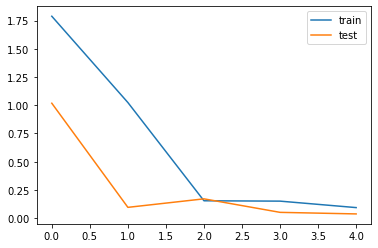

In [230]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.savefig("val_loss.png",dpi = 100)
pyplot.show()

In [222]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [223]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [224]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, 2:]) + 2
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [225]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [234]:
for i in range(0,4):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: procedure comparing syntactic coverage english grammars following constituents single parse would grammar specify three brown corpus sentences one specific among grammars con analysis hand words attach attach elements right verb phrase nodes either verb verb phrase parse hand parse sentence tree two parse procedure three steps parse evaluated fully parsed sentence categories word parenthesis pairs either constituent word compute input parse comparing penn treebank parse sentence example brown corpus sentence best need candidate parse step two treebank output sentence steps one two step three consists comparing candidate parse treebank parse two scores parentheses score number treebank parse evaluated input parentheses recall score number parenthesis pairs intersection candidate treebank parses number parenthesis pairs treebank parse score measure standard candidate parses theory candidate parse constituent analysis input sentence metric sentences brown instead using treebank st

1/1 [==============================] - 0s 22ms/step
Predicted summary:  grammars grammars grammars grammars


Review: models parsing combinatory categorial grammar paper number probability models combinatory categorial parser models corpus penn treebank trees ccg normal form derivations according evaluation word word dependencies best model performance given grammar word word dependencies currently best single model parser scores penn treebank however grammar penn treebank parser well standard elements coverage parsing ccg grammar present number models derivations combinatory categorial grammar penn treebank corpus ccg normal form derivations ccg grammars larger standard penn treebank grammars example many different categorial lexicon extracted training corpus categories pos penn treebank hand grammar rules ccg small number simple unary binary combinatory function application results smaller grammar standard since ccg unary binary branching trees category set ccg scores compared scores

In [237]:
from rouge_metric import PyRouge
hypotheses ="grammars parsing"
reference ="grammars grammars grammars grammars"

hypotheses = hypotheses.ljust(len(reference))[:len(reference)]
# Evaluate on tokenized documents
rouge = PyRouge(rouge_n=(1, 2, 3), rouge_l=True, rouge_w=True,
                rouge_w_weight=1.2, rouge_s=True, rouge_su=True, skip_gap=3)
scores = rouge.evaluate_tokenized(hypotheses, reference)
print(scores)

{'rouge-1': {'r': 0.3142857142857143, 'p': 0.3142857142857143, 'f': 0.3142857142857143}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-3': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.3142857142857143, 'p': 0.3142857142857143, 'f': 0.3142857142857143}, 'rouge-w-1.2': {'r': 0.3142857142857143, 'p': 0.3142857142857143, 'f': 0.3142857142857143}, 'rouge-s3': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-su3': {'r': 0.0, 'p': 0.0, 'f': 0.0}}


In [238]:
from rouge_metric import PyRouge
hypotheses ="grammars grammars grammars parsing "
reference ="grammars grammars grammars grammars"

hypotheses = hypotheses.ljust(len(reference))[:len(reference)]
# Evaluate on tokenized documents
rouge = PyRouge(rouge_n=(1, 2, 3), rouge_l=True, rouge_w=True,
                rouge_w_weight=1.2, rouge_s=True, rouge_su=True, skip_gap=3)
scores = rouge.evaluate_tokenized(hypotheses, reference)
print(scores)

{'rouge-1': {'r': 0.7714285714285715, 'p': 0.7714285714285715, 'f': 0.7714285714285715}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-3': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.7714285714285715, 'p': 0.7714285714285715, 'f': 0.7714285714285715}, 'rouge-w-1.2': {'r': 0.7714285714285715, 'p': 0.7714285714285715, 'f': 0.7714285714285715}, 'rouge-s3': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-su3': {'r': 0.0, 'p': 0.0, 'f': 0.0}}


In [289]:
from rouge_score import rouge_scorer

hypotheses ="grammars parsing"
reference ="grammars grammars grammars grammars"

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)
scores = scorer.score(hypotheses,
                      reference)
print(scores)

INFO - 01:03:29: Using default tokenizer.


{'rouge1': Score(precision=0.25, recall=0.5, fmeasure=0.3333333333333333), 'rouge2': Score(precision=0.0, recall=0.0, fmeasure=0.0), 'rougeL': Score(precision=0.25, recall=0.5, fmeasure=0.3333333333333333)}


In [290]:
hypotheses ="grammars grammars grammars parsing "
reference ="grammars grammars grammars grammars"

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)
scores = scorer.score(hypotheses,
                      reference)
print(scores)

INFO - 01:06:48: Using default tokenizer.


{'rouge1': Score(precision=0.75, recall=0.75, fmeasure=0.75), 'rouge2': Score(precision=0.6666666666666666, recall=0.6666666666666666, fmeasure=0.6666666666666666), 'rougeL': Score(precision=0.75, recall=0.75, fmeasure=0.75)}
